In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
"""
Projekt - redukcja wymiarów, wizualizacja (Analiza głównych składowych, PCA)
L7
Proszę o pobranie danych ze źródła:
https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

Zbiór danych dotyczy kilku gatunków pingwinów żyjących na wyspach archipelagu Palmera. Każdy pingwin jest opisany za pomocą 7 cech (gatunek, zamieszkiwana wyspa, długość dzioba [mm], grubość dzioba [mm], długość skrzydła [mm], masa ciała [g], płeć osobnika).
Należy zastosować PCA do transformacji i wizualizacji danych.
"""

In [ ]:
"""
1. Przygotowanie danych:
1.1. Wczytanie danych zajdujących się w pliku penguins_size.csv do struktury DataFrame.
1.2. Sprawdzenie kompletności danych.
1.3. Podstawowe statystyki.
1.4. Wizualizacja danych (różnicowanie za pomocą kolumny 'spicies').
1.5. Usunięcie brakujących danych.
1.6. Na podstawie danych w kolumnie 'species' należy wygenerować wektor zawierający występujące gatunki pingwinów.
1.7. Na podstawie danych w kolumnie 'species' należy wygenerować wektor zawierający etykiety numeryczne osobników.


Do wyznaczenia składowych głównych należy stworzyć macierz składającą się z 4 parametrów: culmen_lenght_mm, culmen_depth_mm, flipper_length_mm oraz body_mass_g.
"""

### Preprocessing

In [126]:
#1.1. Wczytanie danych
data = pd.read_csv("penguins_size.csv")

In [127]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [128]:
#1.2. Sprawdzenie kompletności danych
data.info()
#można zauważyć że liczba wartości niebędących nullami w niektórych kolumnach jest różna co oznacza że dane nie są kompletne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [129]:
#1.3. Podstawowe statystyki
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


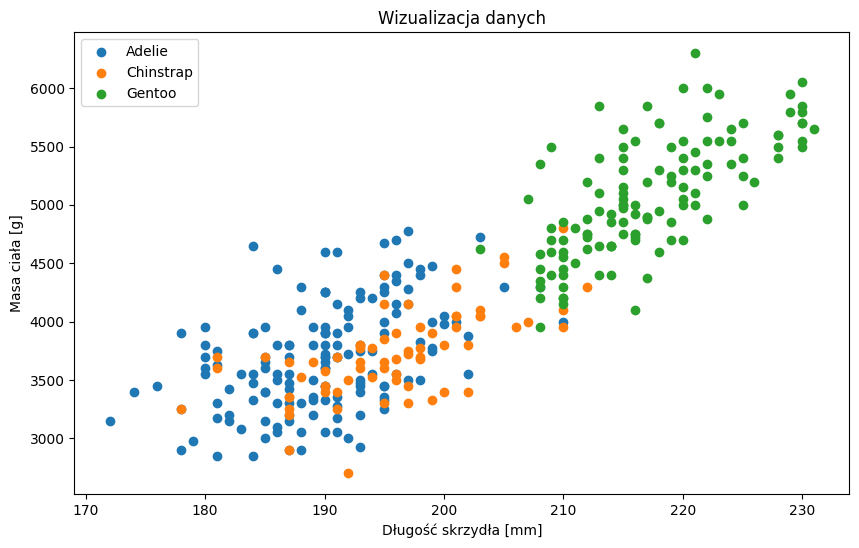

In [130]:
#1.4. Wizualizacja danych
plt.figure(figsize=(10, 6))
for species, group in data.groupby('species'):
    plt.scatter(group['flipper_length_mm'], group['body_mass_g'], label=species)

plt.title('Wizualizacja danych')
plt.xlabel('Długość skrzydła [mm]')
plt.ylabel('Masa ciała [g]')
plt.legend()
plt.show()

In [131]:
# 1.5. Usunięcie brakujących danych
data.dropna(inplace=True)

In [132]:
# 1.6. Generowanie wektora zawierającego występujące gatunki pingwinów
species_vector = data['species'].unique()
species_vector

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [133]:
# 1.7. Generowanie wektora zawierającego etykiety numeryczne osobników
label_vector = pd.factorize(data['species'])[0]
label_vector

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Dane standaryzowane

In [ ]:
"""
2. Analiza PCA dla danych zestandaryzowanych:
2.1. Zastosowanie algorytm PCA do wyznaczenia składowych głównych.
2.2. Jaka część zmienności jest wyjaśniana za pomocą poszczególnych składowych głównych?
2.3. Jakie wagi zostały przypisane poszczególnym cechom podczas wyznaczania składowych głównych?
2.4. W jaki sposób można obliczyć wartości poszczególnych składowych głównych (wzory)?
2.5. Ile składowych głównych jest potrzebnych do wyjaśnienia 75 % wariancji?
2.6. Ile składowych głównych jest potrzebnych do wyjaśnienia 95 % wariancji?
"""

### Dane standaryzowane

In [135]:
#Kolumny do analizy
selected_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = data[selected_columns]

In [136]:
missing_values = X.isna().sum()
missing_values

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [137]:
X = X.dropna()

In [138]:
X.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [139]:
#Standaryzacja danych
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [140]:
# 2.1. Zastosowanie algorytmu PCA
pca_standard = PCA()
principal_components_standard = pca_standard.fit_transform(X_standard)

In [141]:
#2.2. Wyjaśnienie wariancji za pomocą poszczególnych składowych głównych
variance_pca_ratio = pca_standard.explained_variance_ratio_
variance_pca_ratio

array([0.68641678, 0.19448404, 0.09215558, 0.02694359])

In [142]:
np.sum(variance_pca_ratio)

1.0

In [143]:
# 2.3. Wagi przypisane poszczególnym cechom podczas wyznaczania składowych głównych
loadings = pca_standard.components_
loadings

array([[ 0.45330241, -0.39953853,  0.57678201,  0.54973485],
       [ 0.60201807,  0.79485063,  0.00512057,  0.07589797],
       [ 0.64136461, -0.42778965, -0.23691056, -0.59120287],
       [ 0.14402294, -0.15992954, -0.78177342,  0.58524376]])

In [ ]:
#2.4. Wzory do obliczenia wartości poszczególnych składowych głównych
PC1 = 0.45525033 * culmen_length_mm + (-0.40033468) * culmen_depth_mm + 0.57601332 * flipper_length_mm + 0.54835019 * body_mass_g
PC2 = 0.59703114 * culmen_length_mm + 0.79776657 * culmen_depth_mm + 0.0022822 * flipper_length_mm + 0.08436292 * body_mass_g
PC3 = 0.64430115 * culmen_length_mm + (-0.41842724) * culmen_depth_mm + (-0.23208397) * flipper_length_mm + (-0.59660012) * body_mass_g
PC4 = 0.14552311 * culmen_length_mm + (-0.16798597) * culmen_depth_mm + (-0.78379875) * flipper_length_mm + 0.57988211 * body_mass_g

In [145]:
# 2.5. Ile składowych głównych jest potrzebnych do wyjaśnienia 75 % wariancji?
pca = PCA(n_components=0.75)
pca.fit_transform(X_standard)
pca.n_components_

2

In [146]:
#2.6. Ile składowych głównych jest potrzebnych do wyjaśnienia 95 % wariancji?
pca = PCA(n_components=0.95)
pca.fit_transform(X_standard)
pca.n_components_

3

### Dane normalizowane

In [ ]:
"""
3. Analiza PCA dla danych znormalizowanych w zakresie [0,1]:
3.1. Zastosowanie algorytm PCA do wyznaczenia składowych głównych.
3.2. Jaka część zmienności jest wyjaśniana za pomocą poszczególnych składowych głównych?
3.3. Jakie wagi zostały przypisane poszczególnym cechom podczas wyznaczania składowych głównych?
3.4. Ile składowych głównych jest potrzebnych do wyjaśnienia 75 % wariancji?
3.5. Ile składowych głównych jest potrzebnych do wyjaśnienia 95 % wariancji?
"""

In [148]:
#normalizacja danych
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [164]:
#3.1. Zastosowanie algorytm PCA do wyznaczenia składowych głównych.
pca_normalized = PCA()
principal_components_normalized = pca_normalized.fit_transform(X_normalized)

In [150]:
#3.2. Wyjaśnienie wariancji za pomocą poszczególnych składowych głównych
explained_variance_ratio_normalized = pca_normalized.explained_variance_ratio_
print(explained_variance_ratio_normalized)
print(np.sum(explained_variance_ratio_normalized))

[0.69664771 0.19135946 0.08324636 0.02874647]
0.9999999999999999


In [151]:
#3.3. Wagi przypisane poszczególnym cechom podczas wyznaczania składowych głównych
loadings_normalized = pca_normalized.components_
loadings_normalized

array([[ 0.37491217, -0.43691507,  0.61008638,  0.54437183],
       [ 0.51380516,  0.82905021,  0.10468   ,  0.19422181],
       [ 0.75199749, -0.31321814, -0.20097187, -0.54406294],
       [ 0.17304595, -0.15386803, -0.75924107,  0.60822095]])

In [152]:
#3.4. Ile składowych głównych jest potrzebnych do wyjaśnienia 75% wariancji?
pca_normalized = PCA(n_components=0.75)
pca_normalized.fit_transform(X_normalized)
pca_normalized.n_components_

2

In [153]:
#3.5. Ile składowych głównych jest potrzebnych do wyjaśnienia 95% wariancji?
pca_normalized = PCA(n_components=0.95)
pca_normalized.fit_transform(X_normalized)
pca_normalized.n_components_

3

### Dane oryginalne

In [154]:
#4.1. Zastosowanie algorytmu PCA do danych oryginalnych
pca_original = PCA()
principal_components_original = pca_original.fit_transform(X)

In [155]:
#4.2. Wyjaśnienie wariancji za pomocą poszczególnych składowych głównych
explained_variance_ratio_original = pca_original.explained_variance_ratio_
print(explained_variance_ratio_original)
print(np.sum(explained_variance_ratio_original))

[9.99893266e-01 7.81736226e-05 2.49272464e-05 3.63285219e-06]
1.0000000000000002


In [156]:
#4.3. Wagi przypisane poszczególnym cechom podczas wyznaczania składowych głównych
loadings_original = pca_original.components_
loadings_original

array([[ 3.99647058e-03, -1.15646892e-03,  1.52127063e-02,
         9.99875624e-01],
       [-3.17689121e-01,  8.69975388e-02, -9.44064348e-01,
         1.57339757e-02],
       [ 9.41827289e-01,  1.44092036e-01, -3.03640904e-01,
         1.02197989e-03],
       [-1.09631237e-01,  9.85732000e-01,  1.27723462e-01,
        -3.64958474e-04]])

In [ ]:
#4.4. Wzory do obliczenia wartości poszczególnych składowych głównych:
PC1 = 4.05127931e-03 * culmen_length_mm + (-1.16205086e-03) * culmen_depth_mm + 1.52752045e-02 * flipper_length_mm + 9.99874445e-01 * body_mass_g
PC2 = (-3.08489268e-01) * culmen_length_mm + 9.04433417e-02 * culmen_depth_mm + (-9.46786209e-01) * flipper_length_mm + 1.58192151e-02 * body_mass_g
PC3 = 9.44830770e-01 * culmen_length_mm + 1.44317360e-01 * culmen_depth_mm + (-2.94052076e-01) * flipper_length_mm + 8.31740783e-04 * body_mass_g
PC4 = (-1.10058051e-01) * culmen_length_mm + 9.85388833e-01 * culmen_depth_mm + 1.29984301e-01 * flipper_length_mm + (-3.94638476e-04) * body_mass_g

In [158]:
#4.5. Ile składowych głównych jest potrzebnych do wyjaśnienia 75% wariancji?
pca_normalized = PCA(n_components=0.75)
pca_normalized.fit_transform(X)
pca_normalized.n_components_

1

In [159]:
#4.6. Ile składowych głównych jest potrzebnych do wyjaśnienia 95% wariancji?
pca_normalized = PCA(n_components=0.95)
pca_normalized.fit_transform(X)
pca_normalized.n_components_

1

### Wizualizacje

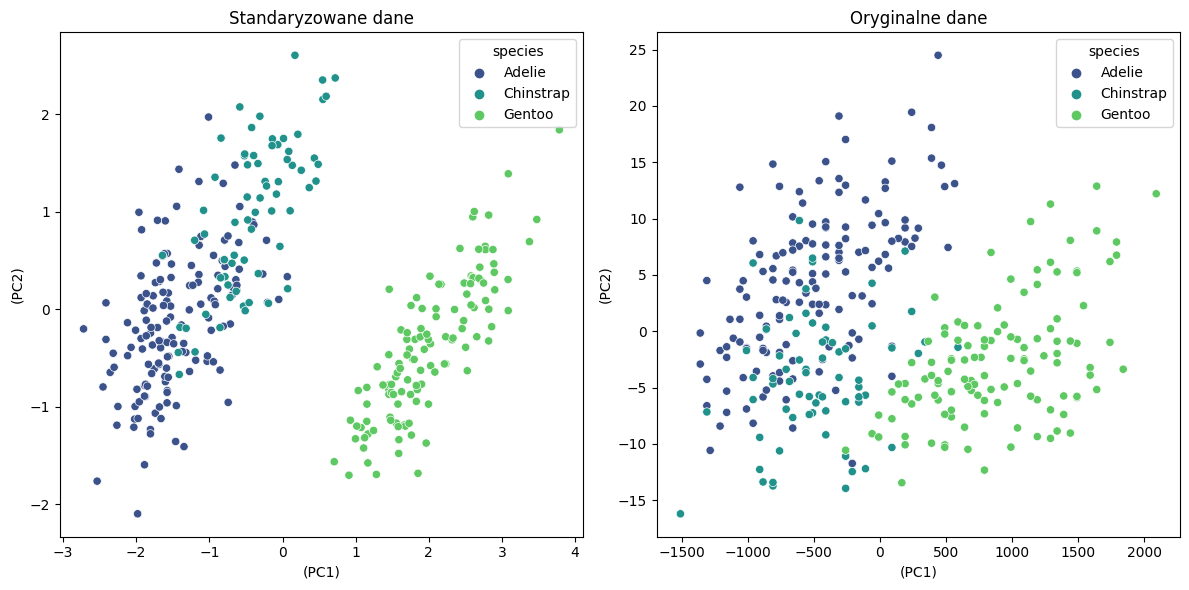

In [160]:
#5.1. Wykres porównawczy na płaszczyźnie PC1-PC2 składający się z dwóch wykresów, zestawiający dane standaryzowane i dane oryginalne (obiekty należące do różnych klas mają zostać oznaczone różnymi kolorami).

plt.figure(figsize=(12, 6))

#dane standaryzowane
plt.subplot(1, 2, 1)
sns.scatterplot(x=principal_components_standard[:, 0], y=principal_components_standard[:, 1], hue=data['species'], palette='viridis')
plt.title('Standaryzowane dane')
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')

#dane oryginalne
plt.subplot(1, 2, 2)
sns.scatterplot(x=principal_components_original[:, 0], y=principal_components_original[:, 1], hue=data['species'], palette='viridis')
plt.title('Oryginalne dane')
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')

plt.tight_layout()
plt.show()

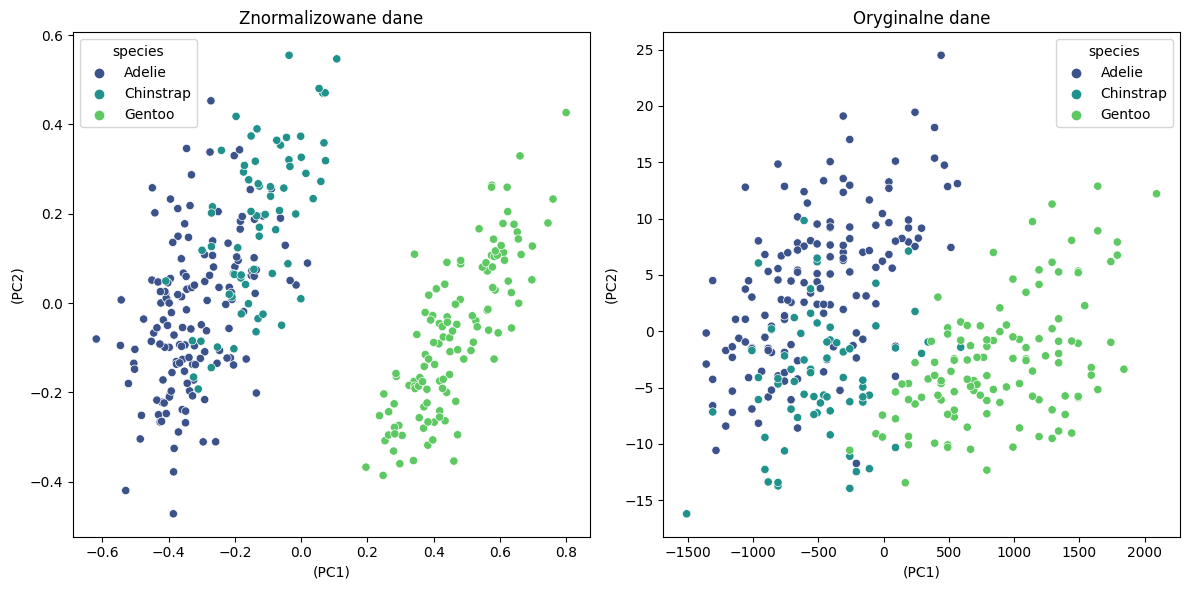

In [165]:
#5.2. Wykres porównawczy na płaszczyźnie PC1-PC2 składający się z dwóch wykresów, zestawiający dane znormalizowane i dane oryginalne (obiekty należące do różnych klas mają zostać oznaczone różnymi kolorami).

plt.figure(figsize=(12, 6))

#dane normalizowane
plt.subplot(1, 2, 1)
sns.scatterplot(x=principal_components_normalized[:, 0], y=principal_components_normalized[:, 1], hue=data['species'], palette='viridis')
plt.title('Znormalizowane dane')
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')

#dane oryginalne
plt.subplot(1, 2, 2)
sns.scatterplot(x=principal_components_original[:, 0], y=principal_components_original[:, 1], hue=data['species'], palette='viridis')
plt.title('Oryginalne dane')
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')

plt.tight_layout()
plt.show()

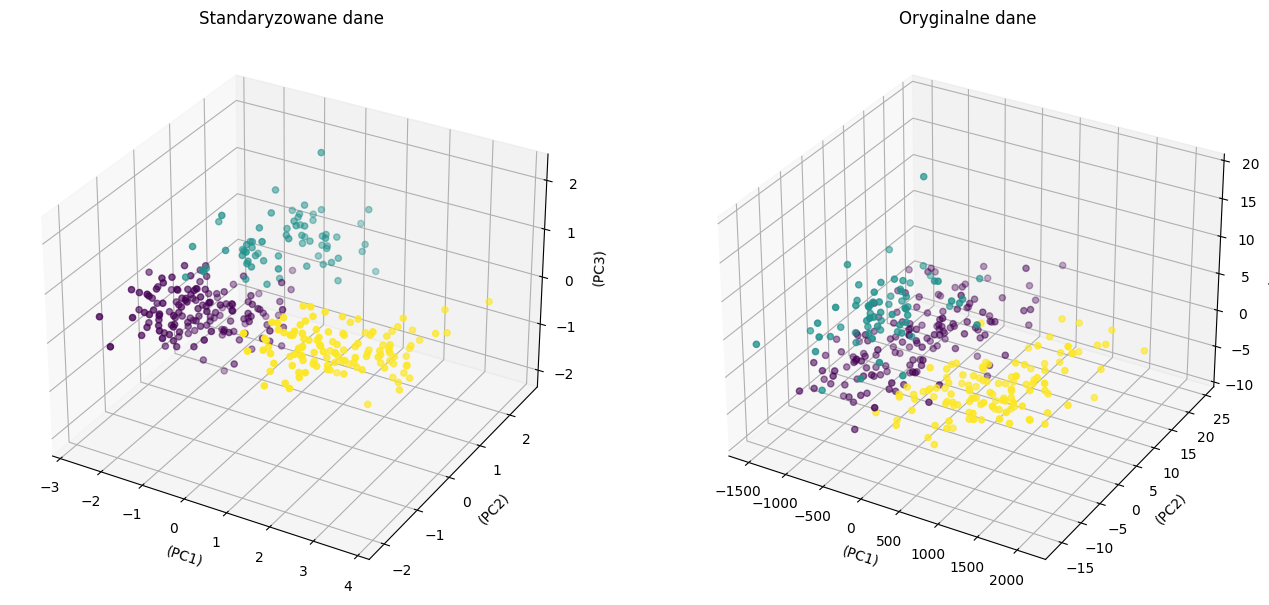

In [166]:
#5.3. Wykres porównawczy w przestrzeni PC1-PC2-PC3 składający się z dwóch wykresów, zestawiający dane standaryzowane i dane oryginalne (obiekty należące do różnych klas mają zostać oznaczone różnymi kolorami).

fig = plt.figure(figsize=(16, 8))

#dane standaryzowane
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(principal_components_standard[:, 0], principal_components_standard[:, 1], principal_components_standard[:, 2], c=data['species'].astype('category').cat.codes, cmap='viridis')
ax1.set_title('Standaryzowane dane')
ax1.set_xlabel('(PC1)')
ax1.set_ylabel('(PC2)')
ax1.set_zlabel('(PC3)')

#dane oryginalne
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(principal_components_original[:, 0], principal_components_original[:, 1], principal_components_original[:, 2], c=data['species'].astype('category').cat.codes, cmap='viridis')
ax2.set_title('Oryginalne dane')
ax2.set_xlabel('(PC1)')
ax2.set_ylabel('(PC2)')
ax2.set_zlabel('(PC3)')

plt.show()

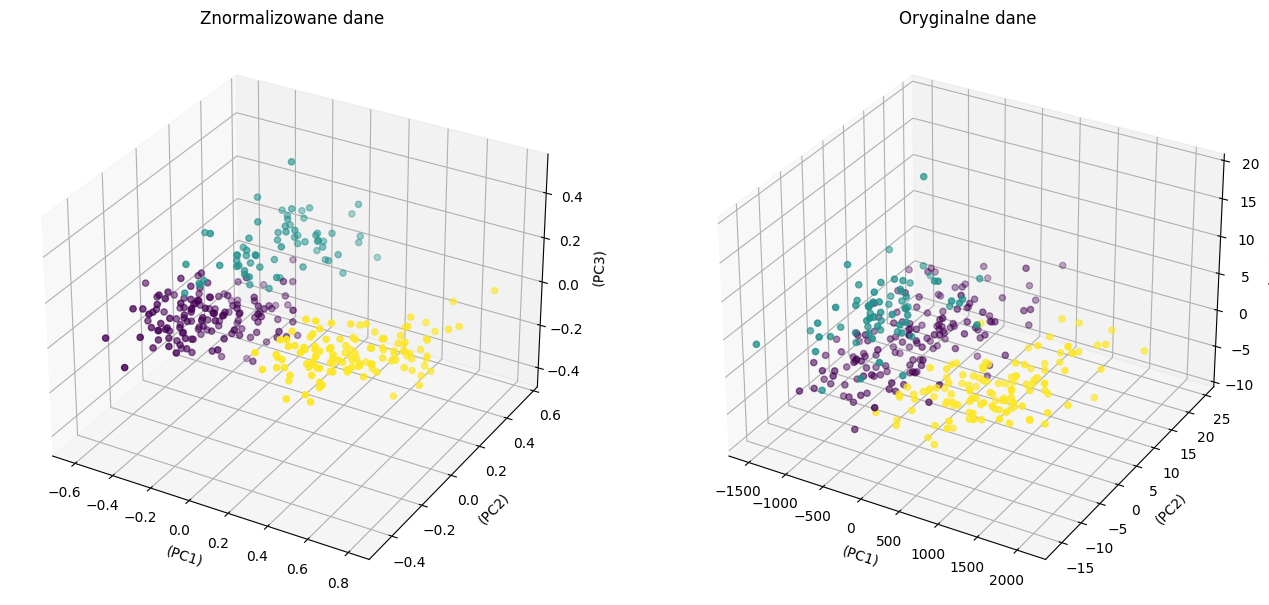

In [168]:
#5.4. Wykres porównawczy w przestrzeni PC1-PC2-PC3 składający się z dwóch wykresów, zestawiający dane znormalizowane i dane oryginalne (obiekty należące do różnych klas mają zostać oznaczone różnymi kolorami).

fig = plt.figure(figsize=(16, 8))

#dane normalizowane
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(principal_components_normalized[:, 0], principal_components_normalized[:, 1], principal_components_normalized[:, 2], c=data['species'].astype('category').cat.codes, cmap='viridis')
ax1.set_title('Znormalizowane dane')
ax1.set_xlabel('(PC1)')
ax1.set_ylabel('(PC2)')
ax1.set_zlabel('(PC3)')

#dane oryginalne
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(principal_components_original[:, 0], principal_components_original[:, 1], principal_components_original[:, 2], c=data['species'].astype('category').cat.codes, cmap='viridis')
ax2.set_title('Oryginalne dane')
ax2.set_xlabel('(PC1)')
ax2.set_ylabel('(PC2)')
ax2.set_zlabel('(PC3)')

plt.show()

In [ ]:
#5.5. Czy skalowanie danych z użyciem standaryzacji i normalizacji znacząco wpłynęła na uzyskane wykresy? W którym przypadku separacja gatunków na wykresach 2D, 3D pozwala na lepsze rozróżnienie klas?

"""
Skalowanie danych może wpływać na uzyskane wykresy, a różnice mogą być zauważalne, zwłaszcza w przypadku analizy PCA.
Standaryzacja i normalizacja danych mają na celu dostosowanie skali poszczególnych cech, co może mieć przełożenie na kierunki i długości wektorów własnych w analizie PCA.
Różnice w uzyskanych wykresach mogą wynikać z różnych skali danych przed i po skalowaniu, co wpływa na to, jakie kierunki w przestrzeni cech są uważane za ważne.
"""